In [20]:
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Create toy dataset
car_color = np.array(['red', 'green', 'red', 'green', 'black', 'black', 'red', 'green'])
wheels_color = np.array(['four', 'six', 'five', 'six', 'four', 'five', 'six', 'four'])
used_status = np.array(['y', 'y', 'n', 'y', 'n', 'n', 'y', 'n'])
car = ['C1','C2','C3','C4','C5','C6','C7','C8']
data = pd.DataFrame({'car':car, 'car_color':car_color, 'wheels_color':wheels_color, 'used_status':used_status})
data = data.set_index('car')
data

,car_color,wheels_color,used_status
car,,,
C1,red,four,y
C2,green,six,y
C3,red,five,n
C4,green,six,y
C5,black,four,n
C6,black,five,n
C7,red,six,y
C8,green,four,n


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 14.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 14.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 10.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 7.0
Run 2, iteration: 2/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clus

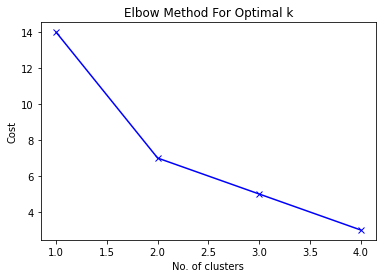

In [23]:

# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [24]:
#Bend at K=2 in the above graph indicating 3is the optimal number of clusters.

In [25]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 7.0
Run 3, iteration: 2/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 7.0
Best run was number 1


array([0, 0, 1, 0, 1, 1, 0, 0], dtype=uint16)

In [26]:
 #insert the predicted cluster values in our original dataset.

In [27]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,car_color,wheels_color,used_status
car,,,,
C1,0,red,four,y
C2,0,green,six,y
C3,1,red,five,n
C4,0,green,six,y
C5,1,black,four,n
C6,1,black,five,n
C7,0,red,six,y
C8,0,green,four,n
